In [52]:
#Import everything
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [54]:
#Read CSV file
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', dtype={'borough': object})
print(df.dtypes)

/tmp/ipykernel_124/799027901.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', dtype={'borough': object})


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [117]:
#In this dataset, we are observing police reported Motor Vehicle Collisions in the state of New York (https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes). 
#We are going to use this dataset to determine: exactly why are so many accidents occuring in the boroughs of New York?
#When determining the accidents, we are going to look at several key factors that may contribute to why the accidents are occuring. 
#Is there a specific type of vehicle we should be aware of when driving on the streets of New York? 
#Does a certain type of vehicle have a certain driving habit that may contribute to an increase in accidents? 
#Another question we will be looking at is when are these accidents most frequently occuring?


In [55]:
#Removing unwanted features. Don't want/need collisions that are >2 vehicles. Don't need coordinates for location, or latitude/longitude.
df = df.drop(columns=['LOCATION','LATITUDE', 'LONGITUDE', 'COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 
                      'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'])
print(df.head())

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE           ON STREET NAME  \
0  09/11/2021       2:39       NaN      NaN    WHITESTONE EXPRESSWAY   
1  03/26/2022      11:45       NaN      NaN  QUEENSBORO BRIDGE UPPER   
2  06/29/2022       6:55       NaN      NaN       THROGS NECK BRIDGE   
3  09/11/2021       9:35  BROOKLYN  11208.0                      NaN   
4  12/14/2021       8:13  BROOKLYN  11233.0          SARATOGA AVENUE   

  CROSS STREET NAME          OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0         20 AVENUE                      NaN                        2.0   
1               NaN                      NaN                        1.0   
2               NaN                      NaN                        0.0   
3               NaN  1211      LORING AVENUE                        0.0   
4    DECATUR STREET                      NaN                        0.0   

   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                       0.0                           

In [56]:
#Checking for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

2283


In [60]:
#Finding how frequently a certain type of vehicle is involved in a crash.
vehicle_types = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']])
vehicle_count = vehicle_types.value_counts()
print(vehicle_count)

Sedan                                  1010556
Station Wagon/Sport Utility Vehicle     803634
PASSENGER VEHICLE                       734813
SPORT UTILITY / STATION WAGON           320495
UNKNOWN                                 101455
                                        ...   
Fdny ems                                     1
2 wheel sc                                   1
In Line Sk                                   1
X Amb                                        1
LIMO VAN                                     1
Name: count, Length: 2760, dtype: int64


In [62]:
#Merge duplicate categories

df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle')
print(df.head())

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE           ON STREET NAME  \
0  09/11/2021       2:39       NaN      NaN    WHITESTONE EXPRESSWAY   
1  03/26/2022      11:45       NaN      NaN  QUEENSBORO BRIDGE UPPER   
2  06/29/2022       6:55       NaN      NaN       THROGS NECK BRIDGE   
3  09/11/2021       9:35  BROOKLYN  11208.0                      NaN   
4  12/14/2021       8:13  BROOKLYN  11233.0          SARATOGA AVENUE   

  CROSS STREET NAME          OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0         20 AVENUE                      NaN                        2.0   
1               NaN                      NaN                        1.0   
2               NaN                      NaN                        0.0   
3               NaN  1211      LORING AVENUE                        0.0   
4    DECATUR STREET                      NaN                        0.0   

   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                       0.0                           

In [126]:
#Find top 5 vehicles involved in collisions
vehicle_types = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']])
vehicle_counts = vehicle_types.value_counts()
top_5 = vehicle_counts.head(5)
print(top_5)

Station Wagon/Sport Utility Vehicle    1124129
Sedan                                  1010556
PASSENGER VEHICLE                       734813
UNKNOWN                                 101455
Taxi                                     90624
Name: count, dtype: int64


In [195]:
vehicle_types = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']])
vehicle_counts = vehicle_types.value_counts()
top_5 = vehicle_counts.head(5)
top_5_df = top_5.reset_index()
top_5_df.columns = ['Vehicle Type', 'Number of Crashes']

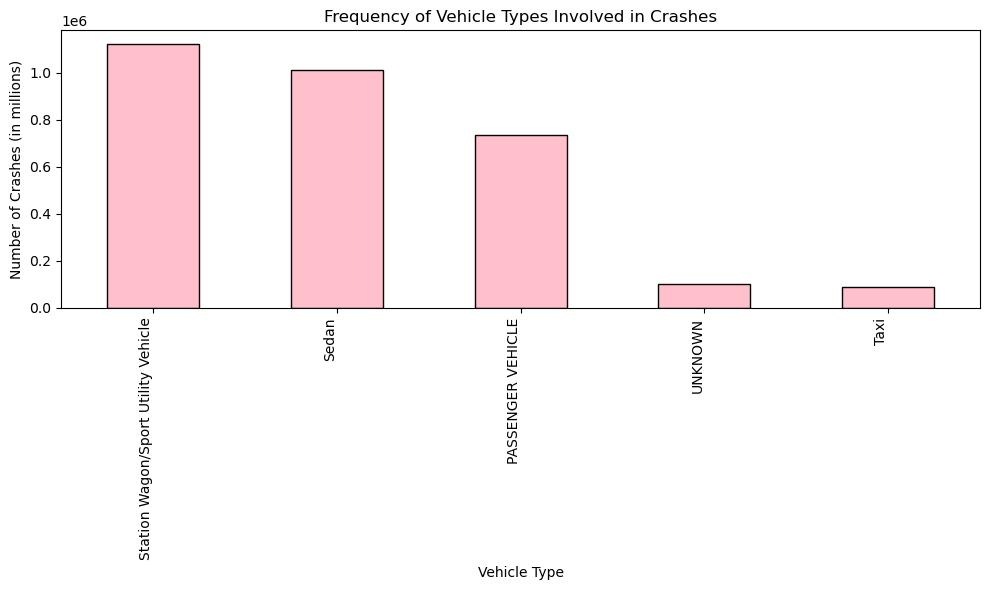

In [197]:
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', edgecolor = 'black', color = 'pink')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes (in millions)')
plt.title('Frequency of Vehicle Types Involved in Crashes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
#The bar graph shows just how many vehicle collisions occur in the boroughs.
#Based on the data so far, there is one vehicle that stands out when it comes to crashes: the Sports Utility Vehicle/Station Wagon. 
#The Sports Utility Vehicle/Station Wagon had 1,124,129 occurences, while the runner up Sedan had 1,010,556.
#The final three categories make up a far less portion, and could also be combined. 
#The passenger vehicle and taxi are likely duplicate entries, but I decided to not combine them as the passenger vehicle could be a service like Uber.
#The last category, Unknown, makes up other vehicles such as motorcycles. 
#These final three categories only had 926,892 occurences, which is far less than the second place Sedan.

In [193]:
#Which borough has the most accidents by which vehicle
vehicle_types = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']])
vehicle_counts = vehicle_types.value_counts()
top_5 = vehicle_counts.head(5).index.tolist()
frequency_vehicle_pivot = pd.pivot_table(df, values='CRASH DATE', index='BOROUGH', columns='VEHICLE TYPE CODE 1', aggfunc='count', fill_value=0)
frequency_vehicle_pivot = frequency_vehicle_pivot[top_5]
print(frequency_vehicle_pivot)

VEHICLE TYPE CODE 1  Station Wagon/Sport Utility Vehicle   Sedan  \
BOROUGH                                                            
BRONX                                              62793   64736   
BROOKLYN                                          145049  130394   
MANHATTAN                                          76168   63472   
QUEENS                                            131584  108811   
STATEN ISLAND                                      18430   18275   

VEHICLE TYPE CODE 1  PASSENGER VEHICLE  UNKNOWN   Taxi  
BOROUGH                                                 
BRONX                            42780     3093   4267  
BROOKLYN                         99924     4981   5394  
MANHATTAN                        61731     3142  21143  
QUEENS                           89081     4501   4037  
STATEN ISLAND                    16841      571     92  


In [170]:
#Which borough is most dangerous to drive in?
frequency_borough_injury = pd.pivot_table(df, values=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'], index='BOROUGH', aggfunc='sum', fill_value=0)
print(frequency_borough_injury)

               NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
BOROUGH                                                           
BRONX                              72009                       289
BROOKLYN                          156487                       644
MANHATTAN                          70084                       351
QUEENS                            119978                       544
STATEN ISLAND                      17704                        97


In [172]:
#Filter for top 5 vehicle types and filtered out Unspecified in the Contributing Factor category
top_5_filter = df[df['VEHICLE TYPE CODE 1'].isin(top_5)]
top_5_filter = top_5_filter[top_5_filter['VEHICLE TYPE CODE 2'].isin(top_5) | top_5_filter['VEHICLE TYPE CODE 2'].isna()]
top_5_filter = top_5_filter[top_5_filter['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']
print(top_5_filter.head())

    CRASH DATE          CRASH TIME    BOROUGH ZIP CODE  \
0   09/11/2021 1900-01-01 02:39:00        NaN      NaN   
1   03/26/2022 1900-01-01 11:45:00        NaN      NaN   
8   12/14/2021 1900-01-01 21:10:00   BROOKLYN  11207.0   
9   12/14/2021 1900-01-01 14:58:00  MANHATTAN  10017.0   
10  12/13/2021 1900-01-01 00:34:00        NaN      NaN   

             ON STREET NAME CROSS STREET NAME          OFF STREET NAME  \
0     WHITESTONE EXPRESSWAY         20 AVENUE                      NaN   
1   QUEENSBORO BRIDGE UPPER               NaN                      NaN   
8                       NaN               NaN  2047      PITKIN AVENUE   
9                  3 AVENUE    EAST 43 STREET                      NaN   
10            MYRTLE AVENUE               NaN                      NaN   

    NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                         2.0                       0.0   
1                         1.0                       0.0   
8                         0.0

In [174]:
#What types of crashes are these vehicles most frequently involved in?
crash_type = pd.pivot_table(top_5_filter, values='CRASH DATE', index='CONTRIBUTING FACTOR VEHICLE 1', columns='VEHICLE TYPE CODE 1', aggfunc='count', fill_value=0)
crash_type['Total Crashes'] = crash_type.sum(axis=1)
crash_type = crash_type.sort_values(by='Total Crashes', ascending=False)
top_10_crash_type = crash_type.head(10)
top_10_crash_type = top_10_crash_type.drop(columns=['Total Crashes'])
print(crash_type)

VEHICLE TYPE CODE 1                                 PASSENGER VEHICLE   Sedan  \
CONTRIBUTING FACTOR VEHICLE 1                                                   
Driver Inattention/Distraction                                  40355  121498   
Failure to Yield Right-of-Way                                   14724   33579   
Following Too Closely                                             287   43403   
Backing Unsafely                                                 9178   20958   
Other Vehicular                                                  9683   14332   
Passing or Lane Usage Improper                                    158   19241   
Fatigued/Drowsy                                                 20183     657   
Passing Too Closely                                                 0   15606   
Turning Improperly                                               6835   10901   
Unsafe Lane Changing                                              127   14214   
Traffic Control Disregarded 

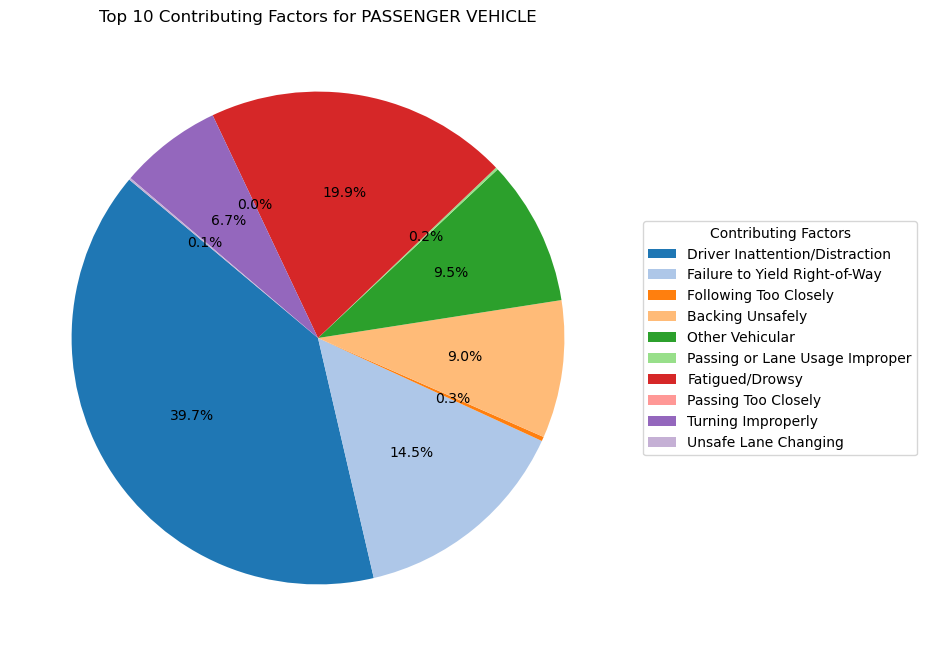

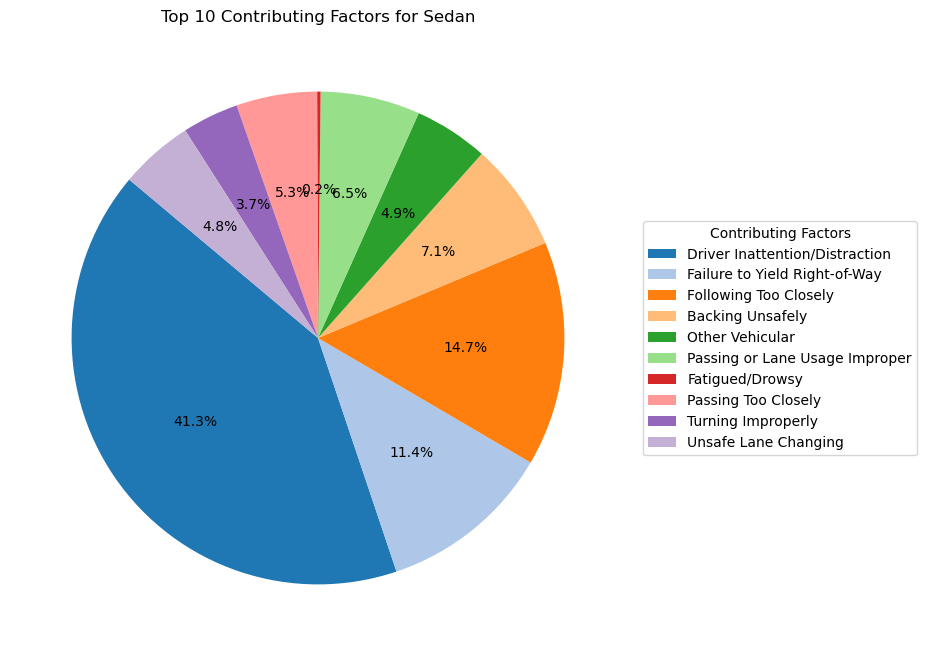

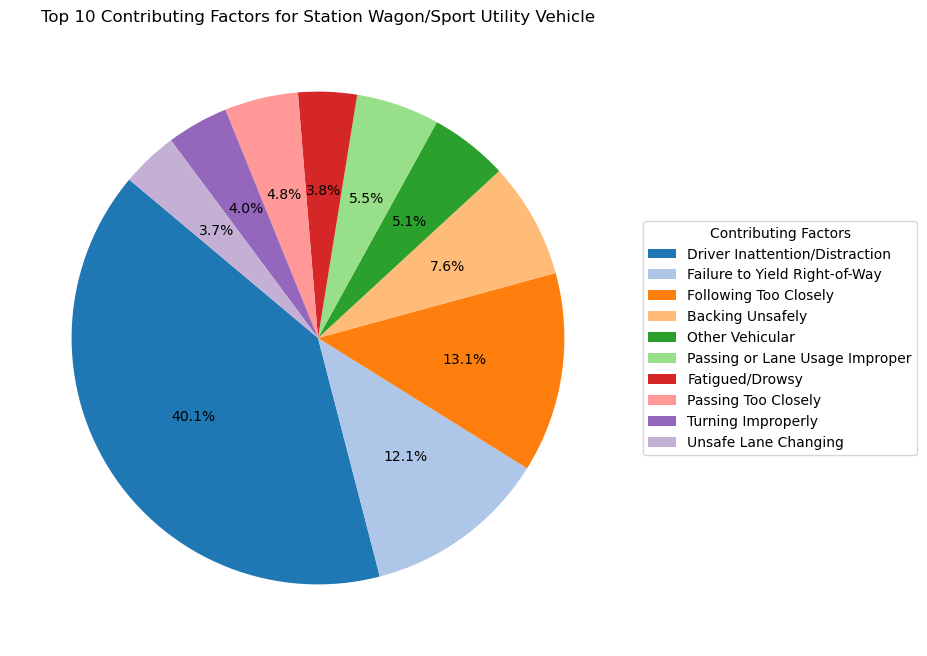

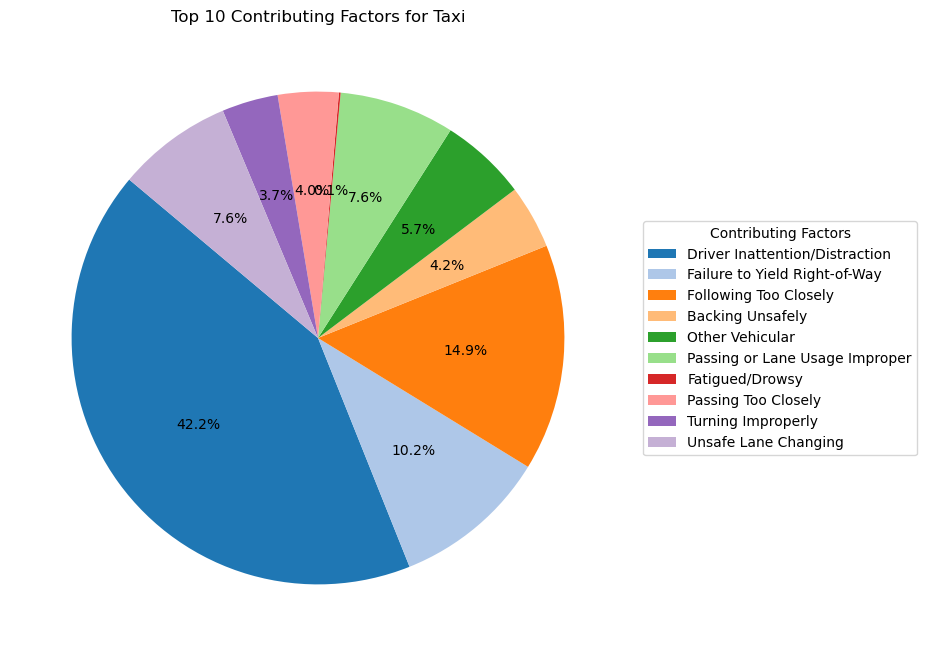

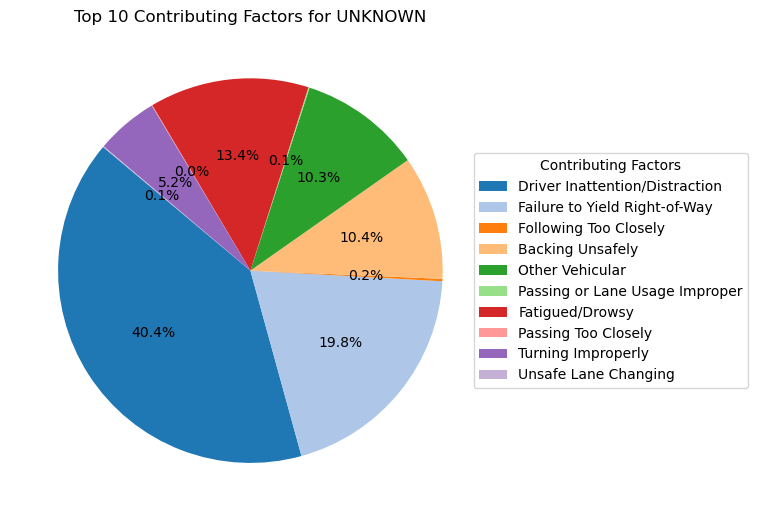

In [176]:
# Pie Chart for crash reason in Vehicles
for vehicle_type in top_10_crash_type.columns:
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(top_10_crash_type[vehicle_type], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors, 
    labels=None)
    ax.legend(wedges, top_10_crash_type.index, title="Contributing Factors", loc="center", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(f'Top 10 Contributing Factors for {vehicle_type}')
plt.tight_layout()
plt.show()

In [ ]:
#The Pie Graph shows the Top 10 Contributing Factors for these accidents. 
#Based on the data, the overall reason for the accidents is Driver Inattention/Distraction, making up around 40% of all occurences.
#Sporty Utility Vehicles/Station Wagons, Sedans, and Taxis' next highest contributing factor was following too closely, while the unknown vehicles failed to yield the right of way.
#An interesting piece of data, which also makes sense, was that the Passenger Vehicle categories' second highest contributing factor was "Fatigued/Drowsy", making up 19.9% of all occurences.
#This is interesting because it is a clear outlier compared to some of the other categories, with Sedans having this occur 0.2% of the time and Sport Utility Vehicles/Station wagons having it occur 3.8% of the time.

In [178]:
#How many crashes per borough
crashes_by_borough = df['BOROUGH'].value_counts()
print(crashes_by_borough)

BOROUGH
BROOKLYN         465156
QUEENS           391497
MANHATTAN        325678
BRONX            216073
STATEN ISLAND     61219
Name: count, dtype: int64


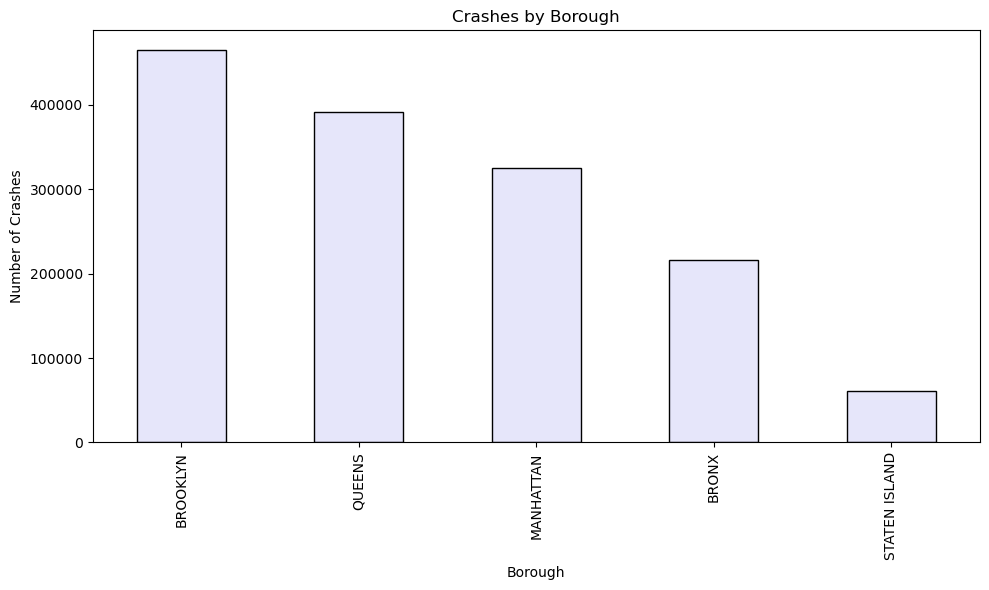

In [180]:
#Bar Graph for crashes per borough
plt.figure(figsize=(10, 6))
crashes_by_borough.plot(kind='bar', edgecolor='black', color='lavender')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Borough')
plt.tight_layout()
plt.show()

In [ ]:
#The final bar graph shows the frequency of accidents per borough. 
#According to the graph, Brooklyn is by far the biggest offender, with a total of 465,156 instances. 
#Queens and Manhattan are not too far behind, with Queens having 391,497 instances and Manhattan having 325,678 instances.
#The Bronx appears to be much safer, with 216,073 instances. Staten Island is easily the safest borough, however. 
#Staten Island had 61,219 occurences.

In [182]:
#Get crash time in Hour
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')
df['Hour'] = df['CRASH TIME'].dt.hour

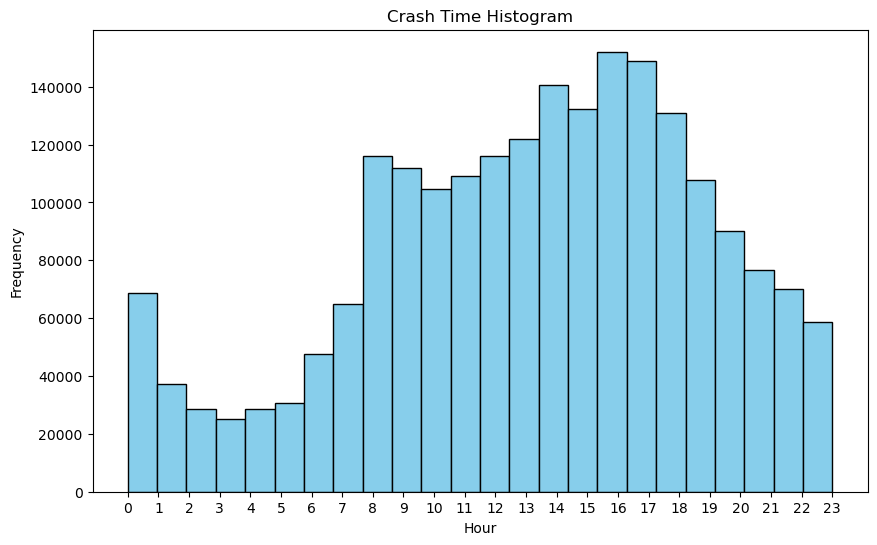

In [184]:
#Frequency of crashes by hour
plt.figure(figsize=(10,6))
plt.hist(df['Hour'], bins=24, edgecolor='black', color='skyblue')
plt.title('Crash Time Histogram')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(0,24))
plt.show()

In [ ]:
#The histogram shows the times that a crash occurs most frequently. 
#The most frequent times for a crash occurs between 15:00 - 18:00.
#The findings make sense due to these times being around the time many people get off of work.
#In contrast, the safest times to drive are between 2:00 - 5:00.
#These findings show most people are not driving during this time. 

In [ ]:
#Based on the analysis of the dataset, several key insights have became clear. 
#When driving through the boroughs of New York, the key offenders were Sport Utility Vehicles/Station Wagons and Sedans, who frequently were distracted and inattentive.
#Brooklyn by far was the most dangerous borough, with Staten Island being the safest. 
#An interesting outlier found was how Passenger Vehicles frequently caused accidents due to fatigue/drowsiness, likely due to how long they spent working per day.
#One thing that I want/need to explore further is if the location plays an impact on accidents.
#As for time of day, there weren't any outliers or unexpected results.
#Crashes occur most frequently when there are more people on the road , and less frequently during the early hours when people are sleeping.
